In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv("Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
X=df[['Annual Income (k$)','Spending Score (1-100)']]

In [6]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

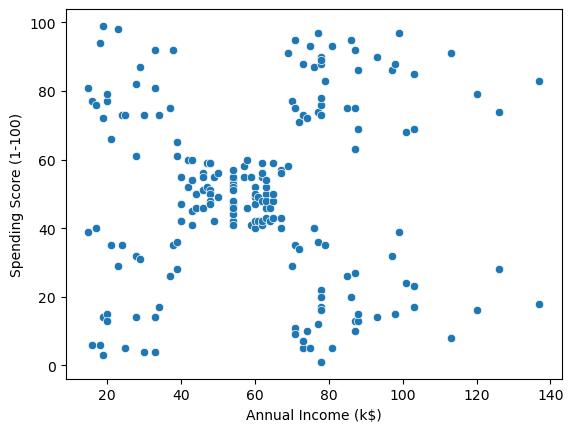

In [7]:
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)')

In [8]:
from sklearn.cluster import KMeans

In [9]:
km=KMeans(n_clusters=4)

In [12]:
km.fit(X)

KMeans(n_clusters=4)

In [13]:
km.inertia_

73679.78903948836

In [14]:
sse=[]
for i in range(1,16):
    km=KMeans(n_clusters=i)
    km.fit(X)
    r=km.inertia_
    sse.append(r)
    
    

In [15]:
sse

[269981.28,
 181363.595959596,
 106348.37306211119,
 73679.78903948836,
 44448.45544793371,
 37265.86520484347,
 30259.65720728547,
 25388.760028179368,
 21818.11458845218,
 19634.55462934998,
 17508.97057740007,
 15836.962939071003,
 14658.519103477169,
 13162.66081180724,
 11668.474544315335]

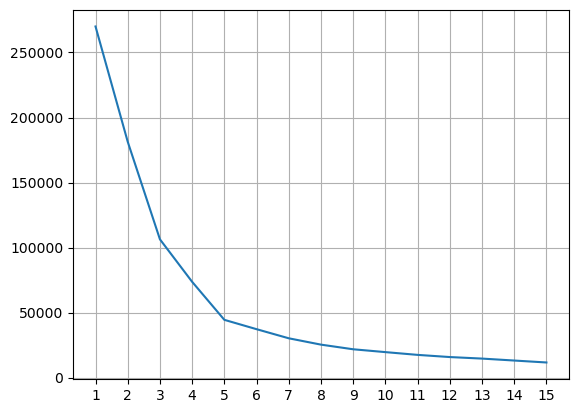

In [16]:
plt.plot(range(1,16),sse)
plt.grid()
plt.xticks(range(1,16))
plt.show()

In [19]:
from sklearn.metrics import silhouette_score

In [22]:
sil=[]
for i in range(2,16):
    km=KMeans(n_clusters=i)
    km.fit(X)
    label=km.predict(X)
    r=silhouette_score(X,label)
    sil.append(r)

In [23]:
sil


[0.2968969162503008,
 0.46761358158775435,
 0.4931963109249047,
 0.553931997444648,
 0.53976103063432,
 0.5281944387251989,
 0.4579252386192864,
 0.457462901394195,
 0.4516611669212085,
 0.44510947299367126,
 0.42358390427720705,
 0.4016838867550095,
 0.41339354090388464,
 0.4040008096595497]

<BarContainer object of 14 artists>

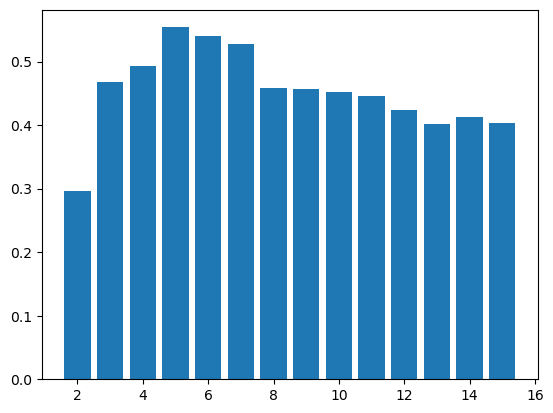

In [24]:
plt.bar(range(2,16),sil)

In [44]:
km=KMeans(n_clusters=5)
label=km.fit_predict(X)

In [47]:
center=km.cluster_centers_
center

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

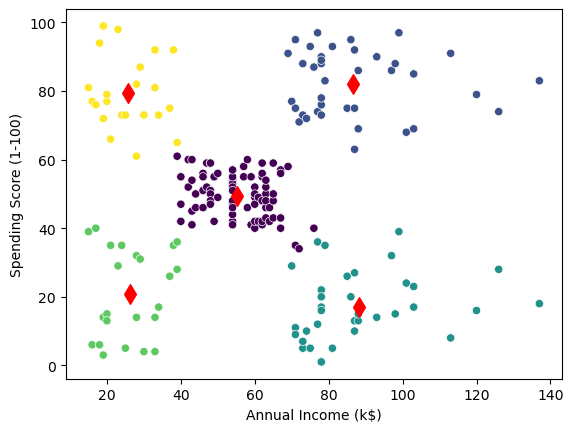

In [48]:
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',c=label)
plt.scatter(center[:,0],center[:,1],marker='d',color='red',s=100)

In [27]:
 import scipy.cluster.hierarchy as sch

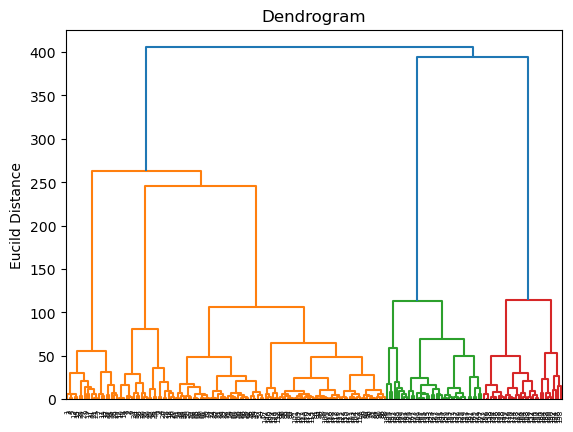

In [33]:
sch.dendrogram(sch.linkage(X,method='ward'));
plt.title("Dendrogram")
plt.ylabel("Eucild Distance")
plt.show()

In [37]:
from sklearn.cluster import  AgglomerativeClustering

In [38]:
km=AgglomerativeClustering(n_clusters=5)

In [39]:
alabel=km.fit_predict(X)

In [41]:
alabel

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

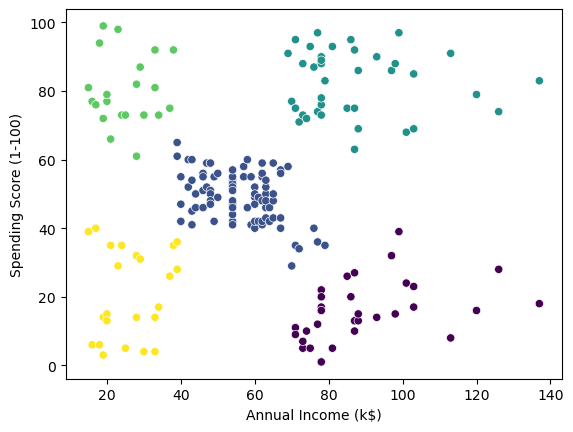

In [49]:
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',c=alabel)